In [1]:
# Lab 10 MNIST and NN
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
with tf.name_scope("Input_Layer"):
    # input place holders
    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None, 10])
    
with tf.name_scope("H_Layer1"):
    W1 = tf.get_variable("W1", shape=[784, 512])
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

with tf.name_scope("H_Layer2"):
    W2 = tf.get_variable("W2", shape=[512, 512])
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

with tf.name_scope("H_Layer3"):
    W3 = tf.get_variable("W3", shape=[512, 512])
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    
with tf.name_scope("H_Layer4"):
    W4 = tf.get_variable("W4", shape=[512, 512])
    b4 = tf.Variable(tf.random_normal([512]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    
with tf.name_scope("OUTPUT"):
    W5 = tf.get_variable("W5", shape=[512, 10])
    b5 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L4, W5) + b5

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
tf.summary.scalar("Cost", cost)


# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar("Accuracy", accuracy)

<tf.Tensor 'Accuracy:0' shape=() dtype=string>

In [4]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())


merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("./logs/MNISTv2")
writer.add_graph(sess.graph)  # Show the graph

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        summary ,c, _ = sess.run([merged_summary,cost, optimizer], feed_dict=feed_dict)
        writer.add_summary(summary, global_step=epoch*i)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost = 0.295805436
Epoch: 0002 cost = 0.105303129
Epoch: 0003 cost = 0.070806229
Epoch: 0004 cost = 0.051644197
Epoch: 0005 cost = 0.038861769
Epoch: 0006 cost = 0.036012623
Epoch: 0007 cost = 0.031401844
Epoch: 0008 cost = 0.025491416
Epoch: 0009 cost = 0.022702811
Epoch: 0010 cost = 0.018646783
Epoch: 0011 cost = 0.020761993
Epoch: 0012 cost = 0.017793775
Epoch: 0013 cost = 0.016838798
Epoch: 0014 cost = 0.015925071
Epoch: 0015 cost = 0.012351228
Learning Finished!
Accuracy: 0.9829


Label:  [7]
Prediction:  [7]


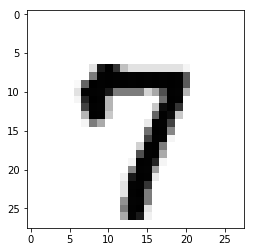

In [5]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()